<a href="https://colab.research.google.com/github/farzin23i/SciSchool-Introduction_to_Machine_Learning/blob/main/week1/OnlineSession1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns

#Linear Regression

In [ ]:
plt.style.use ('seaborn')

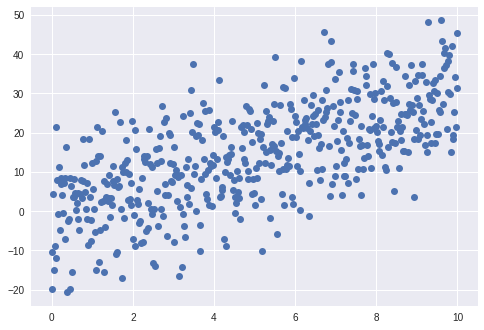

In [ ]:
n = 500
X= np.linspace (0, 10, n)
y= 3*X + 10*np.random.normal (size=n)

plt.plot (X, y, 'o')

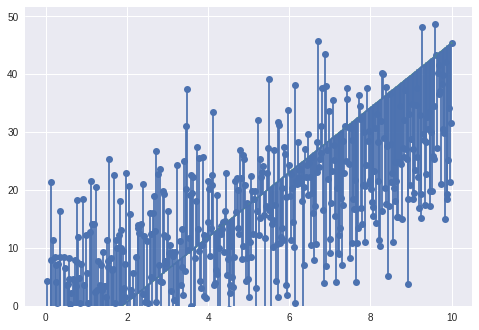

In [ ]:
def vertical_lines (y):
    yl= max(y)+3
    plt.ylim (0, yl)
    [plt.axvline(x=X[i], ymin=min(y_p[i], y[i])/yl, ymax=max(y_p[i], y[i])/yl) for i in range (len(y))]


s= (y[-1]-y[0])/X[-1]-X[0]

y_p = s*X + y[0]

plt.plot (X, y, 'o')
plt.plot (X, y_p)
vertical_lines (y)


Hypithesis: $$h_\theta (x) = \theta_0 + \theta_1x $$
Loss Function: $$J \theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m}  [h_\theta (x_i) - y_i]^2 $$

Gradient Descent Schematic Algorithm:

<img src='https://drive.google.com/uc?id=1KP6zV7AbmbbqKBs1USJOHahmLddXA-ZK' width=500/>

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit (X.reshape(-1, 1), y)

LinearRegression()

In [ ]:
theta1 = model.coef_

In [ ]:
theta0 = model.intercept_

In [ ]:
print (theta0, theta1)

-0.427730591146263 [3.20662754]


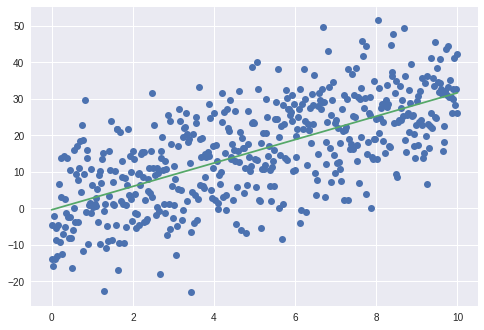

In [ ]:
y_pred= theta0 + theta1*X

plt.plot (X, y, 'o')
# plt.plot (X, y_p)
plt.plot (X, y_pred)

#Logistics Regression

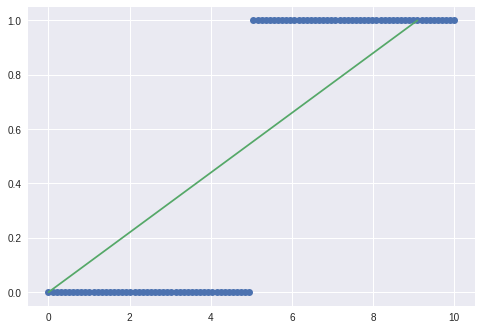

In [ ]:
n= 100
X= np.linspace (0, 10, n)

y = np.array([0]*int(n/2) + [1]*int(n/2))

plt.plot (X, y, 'o')
plt.plot (X[[0, 90]], y[[0,90]])

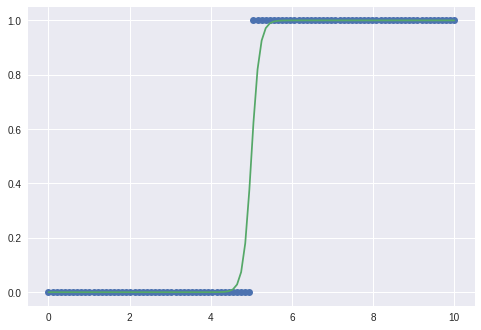

In [ ]:
theta0= 5
theta1= 10
z= theta1*(-theta0 + X)

y_p = (1/(1+np.exp(-z)))

plt.plot (X, y, 'o')
plt.plot (X, y_p)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit (X.reshape(-1, 1), y)

LogisticRegression()

In [ ]:
y_pred= model.predict (X.reshape (-1,1))


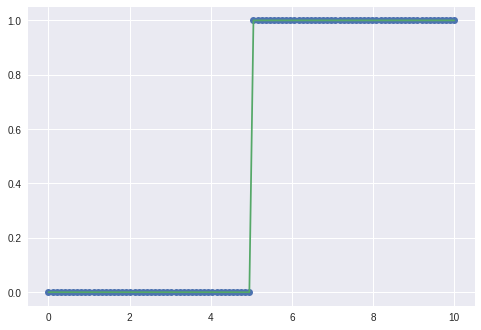

In [ ]:
plt.plot (X, y, 'o')
plt.plot (X, y_pred)

In [ ]:
x_test= np.linspace (-5, 15, 500)
ypred2= model.predict (x_test.reshape (-1,1))

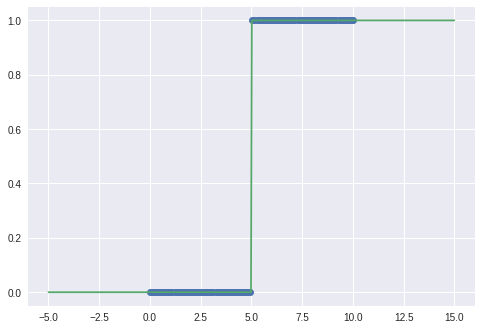

In [ ]:
plt.plot (X, y, 'o')
plt.plot (x_test, ypred2)

#Work on a real World Data

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
# %cd drive/

In [ ]:
!kaggle datasets download -d ishaanthareja007/company-sales

  0% 0.00/1.82k [00:00<?, ?B/s]
100% 1.82k/1.82k [00:00<00:00, 2.77MB/s]


In [ ]:
!unzip /content/company-sales.zip

Archive:  /content/company-sales.zip
  inflating: company.csv             


In [ ]:
df= pd.read_csv ('/content/company.csv')
df.head ()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


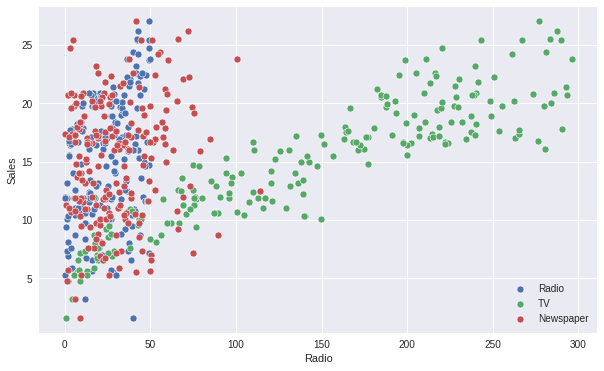

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='Radio',y='Sales',data=df, label='Radio')
sns.scatterplot(x='TV',y='Sales',data=df, label='TV')
sns.scatterplot(x='Newspaper',y='Sales',data=df, label='Newspaper')

plt.legend ()

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
X= df[['TV', 'Radio', 'Newspaper']]
y= df['Sales']

In [ ]:
X.shape 

(200, 3)

In [ ]:
model = LinearRegression()
model.fit (X, y)

LinearRegression()

In [ ]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [ ]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.054446
Radio,0.107001
Newspaper,0.000336


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape 

(160, 3)

In [ ]:
model = LinearRegression()
model.fit (X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict (X_test)

In [ ]:
y_test-predictions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


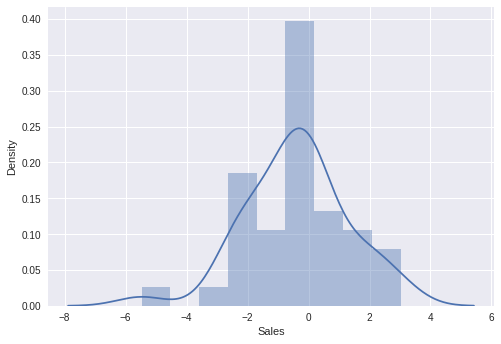

In [ ]:
sns.distplot((y_test-predictions))